# TPM034A Machine Learning for socio-technical systems 
## `Lab session 02: Artificial Neural Networks`

**Delft University of Technology**<br>
**Q2 2025**<br>
**Instructor:** Sander van Cranenburgh & Francisco Garrido Valenzuela<br>

### `Instructions`

**Lab sessions aim to:**<br>
* Show and reinforce how models and ideas presented in class are used in practice.<br>
* Help you gather hands-on machine learning skills.<br>

**Lab sessions are:**<br>
* Learning environments where you work with Jupyter notebooks and where you can get support from TAs and fellow students.<br> 
* Not graded and do not have to be submitted. 

### `Use of AI tools`
AI tools, such as ChatGPT and Co-pilot, are great tools to assist with programming. Moreover, in your later careers you will work in a world where such tools are widely available. As such, we **encourage** you to use AI tools **effectively** (both in the lab sessions and assignments). However, be careful not to overestimate the capacity of AI tools! AI tools cannot replace you: you still have to conceptualise the problem, dissect it and structure it, to conduct proper analysis and modelling. We recommend being especially **reticent** with using AI tools for the more conceptual and reflective oriented questions. 

### `Google Colab workspace set-up`

Uncomment the following cells code lines if you are running this notebook on Colab

In [1]:
#!git clone https://github.com/TPM034A/Q2_2025
#!pip install -r Q2_2025/requirements_colab.txt
#!mv "/content/Q2_2025/Lab_sessions/lab_session_02/data" /content/data

### `Application: Mode choice prediction` <br>
In this lab session, we will use ANN to predict mode-choice behaviour. In transportation, policy-makers often estimate the potential change in mode-choice behaviour resulting from a proposed policy, such as fuel levies, subsidization of public transport, or speed limits. Additionally, they use it for planning transport infrastructure. Based on travel demand forecast e.g. roads are widened or new train connections are built. Traditionally, mode choice predictions are based on classic econometric tools. Recently, the high prediction performance of ML methods appeals to researchers to use ML for predicting choice behaviour too. In this lab session, you will develop ANNs to predict mode behaviour and assess its performance.<br>


**Learning objectives**. After completing the following exercises you will be able to: <br>
1. `Prepare data` for training
2. Train `MultiLayerPerceptron` (MLP) - a particular type of artifical neural network - for a classification task<br>
3. `Tune` the `hyperparameters` to improve the model performance<br>
4. `Assess the performance` of competing models based on various performance measures, including confusion matrices, and Precision, Recall and Matthew's coefficient<br>

#### `Organisation`
This lab session comprises **`6`** parts:
1. Preparing (choice) data for training Artificial Neural Networks
2. Training a MultiLayerPerceptron (MLP) neural network
3. Using Early stopping to avoid overfitting
4. Using k-fold cross validation to evaluate generalisation performance
5. Tuning hyperparameters
6. Evaluating performance of trained models

and comprises **`7`** `exercises`.

In [2]:
# Import required Python packages and modules
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random

# Import selected functions and classes from Python packages
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, log_loss, matthews_corrcoef, make_scorer, classification_report, confusion_matrix
from matplotlib.ticker import FixedLocator


# Setting
pd.set_option('display.max_columns', None)

In [3]:
# Fix the seed numbers for reproducibility
np.random.seed(42)
random.seed(42)

#### 1. Preparing (choice) data for training Artificial Neural Networks<br>
To prepare the data set, we will:<br>
- 1.1 **Load** the data set<br>
- 1.2 **Inspect** and **Clean** the data set<br>
- 1.3 **Discover and visualise** the data <br>

##### 1.1. Load the choice data<br>

In [4]:
# Load mode choice data into a pandas DataFrame
data_folder = Path('data')
df = pd.read_csv(data_folder/'swissmetro.dat', sep = '\t')

##### 1.2 Inspect and clean the data<br>
Before starting to analyse your data, make sure you understand what features are in your data.<br>
Therefore, it is `highly recommended` to look at the description of the data set. [Click here](data/CS_SwissmetroDescription.pdf) to open the pdf.

In [5]:
# Inspect the range and distribution statistics 
df.describe()

# Inspect the data types in the df
# df.info()

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,MALE,INCOME,GA,ORIGIN,DEST,TRAIN_AV,CAR_AV,SM_AV,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
count,10728.000000,10728.000000,10728.0,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.0,10728.000000,10728.0,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000
mean,2.630034,0.630034,1.0,596.500000,2.914430,0.470638,2.888423,1.493289,0.678691,2.898490,0.750000,2.330537,0.141779,13.323826,10.796141,1.0,0.843121,1.0,166.626025,514.335477,70.100671,87.466350,670.340697,20.020507,0.118568,123.795209,78.742077,2.152778
std,0.482818,0.482818,0.0,344.116678,1.147443,0.499160,2.191100,0.708293,0.603388,1.031726,0.433033,0.940275,0.348839,10.140805,9.746795,0.0,0.363704,0.0,77.353284,1088.931881,37.431633,53.550371,1441.594614,8.161895,0.323295,88.710743,55.263663,0.632293
min,2.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,0.000000,1.0,31.000000,4.000000,30.000000,8.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.0,298.750000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.750000,2.000000,0.000000,2.000000,1.000000,1.0,1.000000,1.0,109.000000,58.000000,30.000000,55.000000,70.000000,10.000000,0.000000,70.000000,40.000000,2.000000
50%,3.000000,1.000000,1.0,596.500000,3.000000,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,0.000000,17.000000,10.000000,1.0,1.000000,1.0,157.000000,94.000000,60.000000,78.000000,111.000000,20.000000,0.000000,120.000000,76.000000,2.000000
75%,3.000000,1.000000,1.0,894.250000,3.250000,1.000000,3.000000,2.000000,1.000000,4.000000,1.000000,3.000000,0.000000,22.000000,22.000000,1.0,1.000000,1.0,209.000000,170.000000,120.000000,109.000000,209.000000,30.000000,0.000000,176.000000,112.000000,3.000000
max,3.000000,1.000000,1.0,1192.000000,9.000000,1.000000,10.000000,3.000000,3.000000,6.000000,1.000000,4.000000,1.000000,25.000000,26.000000,1.0,1.000000,1.0,1049.000000,5040.000000,120.000000,796.000000,6720.000000,30.000000,1.000000,1560.000000,520.000000,3.000000


In [6]:
# Data cleaning

# Only keep data for purposes 'Commute" and "Business"
df.drop(df[(df.PURPOSE != 1) & (df.PURPOSE != 3)].index, inplace=True) 

# Drop rows with unknown choices (CHOICE == 0)
df.drop(df[df.CHOICE == 0].index, inplace=True) 

# In case of missing values, we replace them with 0
df.fillna(0, inplace = True) 

##### 1.3 Discovering and visualising the data<br>
Before starting to analyse your data with models, it is advisable to start with some **descriptive analyses**.<br>
Therefore, we first look at the distribution and correlations of key features in the data.

### <span style="color:skyblue">Exercise 1: Is the data set (im)balanced?</span> 
`A` Create a histogram showing how often TRAIN, SM and CAR are chosen. Do not forget to add labels to the columns<br>
`B` Interpret the the histogram. Is the data set imbalanced? <br>

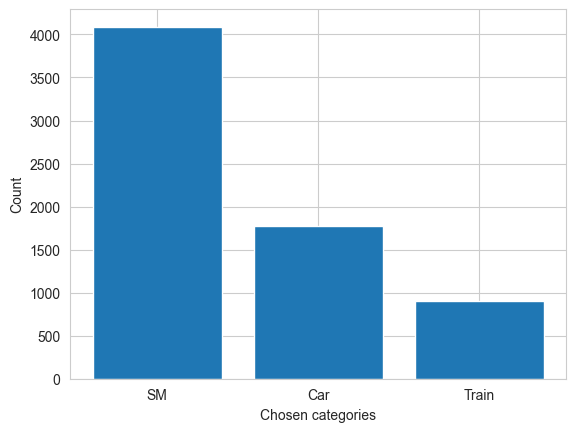

In [7]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# ANSWERS
fig, ax = plt.subplots()
plt.bar(df['CHOICE'].value_counts().index.map({1:'Train', 2:'SM', 3:'Car'}), df['CHOICE'].value_counts().values)
ax.set_xlabel('Chosen categories')
ax.set_ylabel('Count')
plt.show()

Yes it is inbalanced, most people use SwissMetro (SM)

### <span style="color:skyblue">Exercise 2: Explore correlations between features</span> 
`A` Create a heatmap to identify what features particularly correlate with the **CHOICE**<br>
`B` Identify the features that strongly correlate (corr >0.9) (if any). Do they make sense? <br>
Hint: to do so you will need the description of the features [Click here](https://github.com/TPM34A/Q2_2022/blob/main/Lab_sessions/lab_session_02/data/CS_SwissmetroDescription.pdf) to open the pdf.

In [8]:
df

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,MALE,INCOME,GA,ORIGIN,DEST,TRAIN_AV,CAR_AV,SM_AV,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
0,2,0,1,1,1,0,1,1,0,3,0,2,0,2,1,1,1,1,112,48,120,63,52,20,0,117,65,2
1,2,0,1,1,1,0,1,1,0,3,0,2,0,2,1,1,1,1,103,48,30,60,49,10,0,117,84,2
2,2,0,1,1,1,0,1,1,0,3,0,2,0,2,1,1,1,1,130,48,60,67,58,30,0,117,52,2
3,2,0,1,1,1,0,1,1,0,3,0,2,0,2,1,1,1,1,103,40,30,63,52,20,0,72,52,2
4,2,0,1,1,1,0,1,1,0,3,0,2,0,2,1,1,1,1,130,36,60,63,42,20,0,90,84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,3,1,1,939,3,1,7,3,1,5,1,2,0,1,2,1,1,1,108,13,30,50,17,30,0,130,64,1
8447,3,1,1,939,3,1,7,3,1,5,1,2,0,1,2,1,1,1,108,12,30,53,16,10,0,80,80,1
8448,3,1,1,939,3,1,7,3,1,5,1,2,0,1,2,1,1,1,108,16,60,50,16,20,0,80,64,1
8449,3,1,1,939,3,1,7,3,1,5,1,2,0,1,2,1,1,1,128,16,30,53,17,30,0,80,104,1


<Axes: >

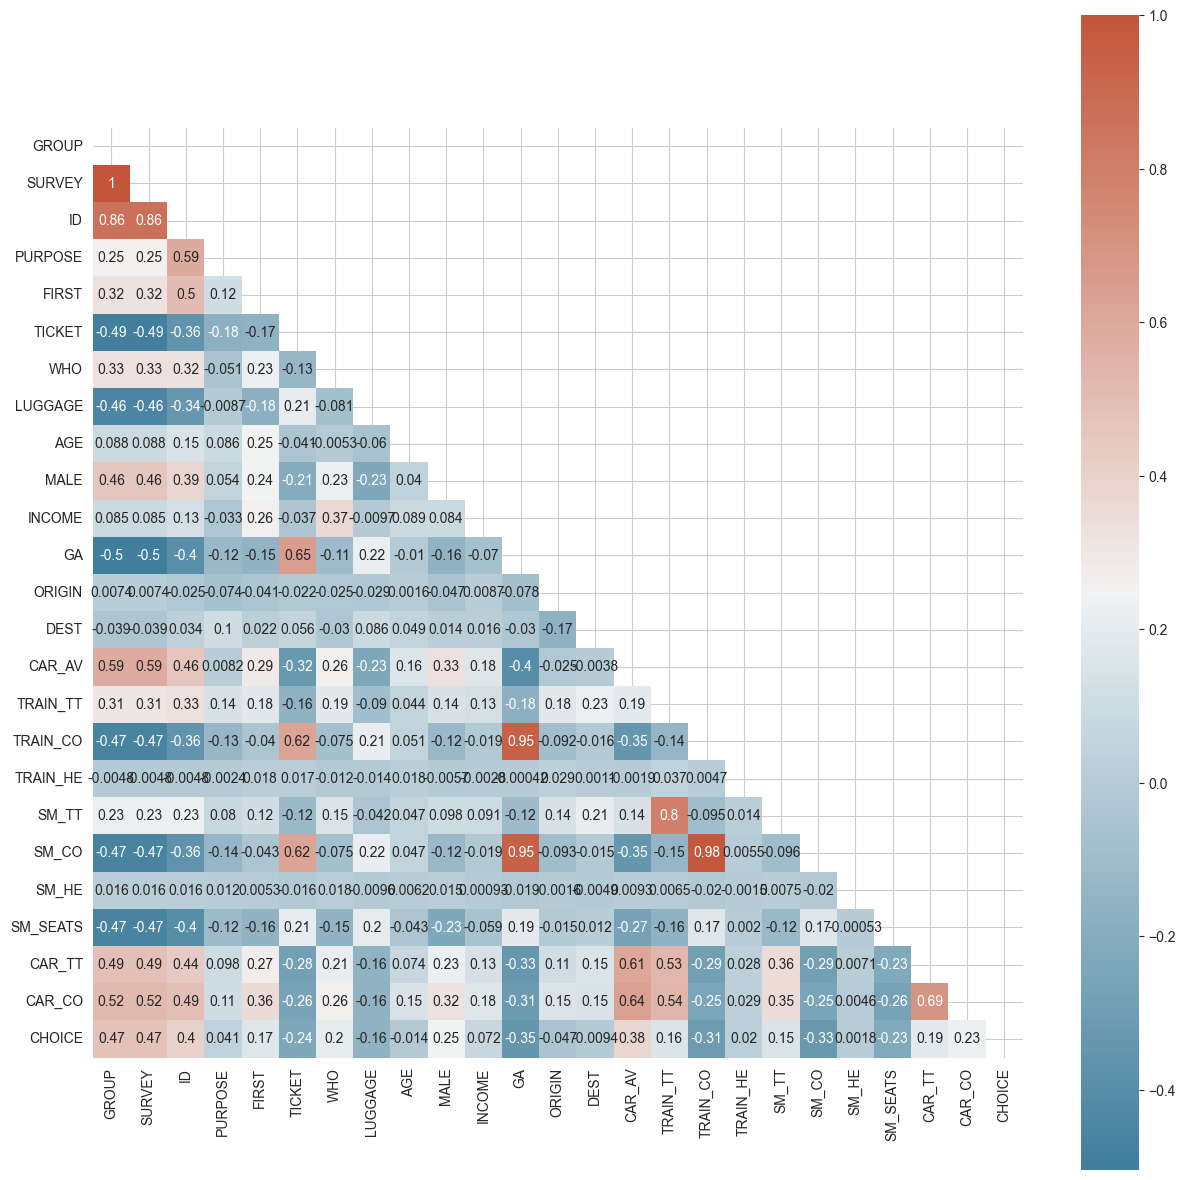

In [9]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# ANSWERS
fix, axes = plt.subplots(1,1, figsize = (15 ,15))
fig.set_tight_layout(True)

#compute correlation of following columns
cols_to_exclude = ['SP', 'TRAIN_AV', 'SM_AV']
corr = df[[c for c in df.columns if c not in cols_to_exclude]].corr()

#create upper triangle mask
corr_mask = np.triu(np.ones_like(corr, dtype=bool))

corr_cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask = corr_mask, cmap = corr_cmap, ax = axes, square = True, annot=True)



In [10]:


# threshold = 0.9
# high_corr = corr[(abs(corr) > threshold) & (corr != 1.0)]
# high_corr
#
threshold = 0.9

high_corr_dict = {}

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):      # avoid duplicates & diagonal
        value = corr.iloc[i, j]
        if abs(value) > threshold:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            high_corr_dict[(col1, col2)] = value



In [11]:
del high_corr_dict[('GROUP', 'SURVEY')]
# high_corr_df = pd.DataFrame(high_corr_dict)

In [12]:
high_corr_dict

{('GA', 'TRAIN_CO'): np.float64(0.9458754170979361),
 ('GA', 'SM_CO'): np.float64(0.946213231773524),
 ('TRAIN_CO', 'SM_CO'): np.float64(0.9824935143940413)}

So there is a correlation between ownership of a seasonal train ticet and both traincost which makes sense because if you have a subsciption, you have no cost

Also if you have a subscription, you also have no sm costs

Also train cost and sm costs are correlated since a longer journey is a higher train price but also higher sm price.

#### 2. Training a MultiLayerPerceptron (MLP)
To train an MLP (or any other sorts of artifical neural networks) we must take the following steps:<br>
- 2.1 **Splitting** the data in a training and test data set<br>
- 2.2 **Scaling** the features<br>
- 2.3 **Creating the model object**<br>
- 2.4 **Training** the model on the train data<br>
- 2.5 **Evaluating** the performance on the test data

##### 2.1 Splitting the data in a train set and a test set<br>
Training ML models always involves a **train** and a **test** data set. The train set is used to update the weights of the model. That test set is used to evaluate the **generalisation performance** of the model.

In [13]:
# Create the list of features that we want to use in the model
features = ['PURPOSE', 'FIRST', 
            'TICKET', 'WHO', 'LUGGAGE', 'AGE', 
            'MALE', 'INCOME', 'GA', 'ORIGIN', 
            'DEST', 'TRAIN_TT', 'TRAIN_CO', 
            'TRAIN_HE', 'SM_TT', 'SM_CO', 
            'SM_HE', 'SM_SEATS', 'CAR_TT', 'CAR_CO',
            'TRAIN_AV', 'SM_AV', 'CAR_AV']
X = df.loc[:,features]

# Create the target
Y = df['CHOICE']

In [14]:
# Split the data using sk-learn's `train_test_split` function
# Note that we use 60% for training and 40% for testing
# Note that we set the random_state, in order to replicate results later (do not change) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.4)

##### 2.1 Scaling the features<br>
To efficiently train ANNs it strongly recommended to **scale** (a.k.a. normalise) the features. There are several ways to scale your data. A commonly used scaler of `sk-learn` is called 'StandardScaler'. This scaler normalises the variance and shift the location of the distribution to zero, see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [15]:
# Initiate scaler object & fit to data
scaler = StandardScaler()  
scaler.fit(X_train)  

# Create new dataframe X_scaled containg the scaled features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 2.3 Creating the model object<br>
A MultiLayerPerceptron (MLP) is a fully-connected feed-forward neural network. We create the MLP using `sk-learn's` MLPClassifier function. 

In [48]:
# Create 'plain vanilla' MLP object
# Declare the number of layers and nodes per layer
# layers = (a,b) means two layer with a nodes in the 1st hidden layer and b nodes in the 2nd hidden layer
layers = (10,10)

# Define MLP architecture, optimiser and hyperparameters:
# We use Adam optimiser
# We use the learning rate to 0.001
# We use L2 regularisation of 0.1
# We use a batch size of 250 observations
# We use tanhg activation (transfer function)
# We set the max number of epochs to 2000
mlp = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = 0.001, alpha=0.1, batch_size=250, activation = 'tanh', max_iter = 2000) 

##### 2.4 Training the model<br>
To train the MLP we use the '.fit' function.  

In [49]:
# Train the MLP using the train data.
mlp.fit(X_train_scaled, Y_train)

,hidden_layer_sizes,"(10, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,0.1
,batch_size,250
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True
,random_state,None


Text(0.5, 1.0, 'Cross entropy loss on the TRAINING DATA. \nBest CE = 0.561')

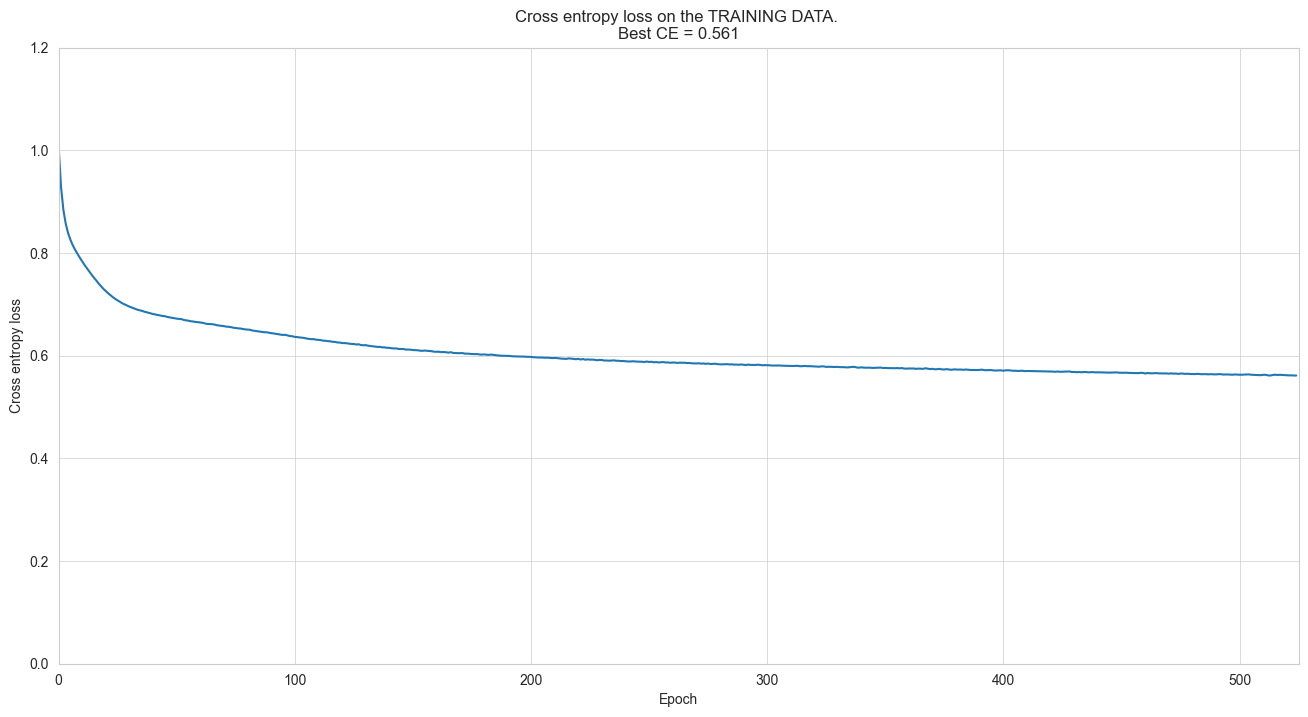

In [45]:
# It is good practice to look at the learning curve, to see how much the model has improved from the initial point,
# and how is has evolved over epochs.
fig, ax = plt.subplots(figsize = (16,8))
plt.plot(mlp.loss_curve_)
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross entropy loss')
ax.grid(True,linewidth = 0.5)
ax.set_ylim(0.0,1.2)
ax.set_xlim(0,mlp.n_iter_)
ax.set_title(f'Cross entropy loss on the TRAINING DATA. \nBest CE = {mlp.loss_:4.3f}')
# The plot illustrates that the training stops when the training loss does no longer improve more that a given tolerance (e.g. 1e-6), or reaches max_iter

##### 2.5 Evaluating the model performance<br>
To evaluate the generalisation performance of our MLP, we look at the accuracy and cross-entropy on the train and test data sets.

In [30]:
# Let's create a function that returns the accuracy and the cross entropy, for the train and test data sets
def calculate_acc_ce(mlp,X_train,Y_train,X_test, Y_test):
    
    def calculate_acc(mlp,X,Y):
        accuracy = mlp.score(X,Y)
        return accuracy

    def calculate_ce(mlp,X,Y):
        # Compute cross entropy
        # Use the model object to predict probabilities per class
        prob = mlp.predict_proba(X)

        # Multiply the probabilities with Y (0/1 array), and sum along the row axis to obtain the predicted probability of the target
        Y_dummy = pd.get_dummies(Y).to_numpy()
        prob_chosen = np.sum(prob*Y_dummy,axis=1)    
        
        # Take the logarithm
        log_prob_chosen = np.log(prob_chosen)

        # Compute the cross entropy
        cross_entropy = -np.sum(log_prob_chosen)/len(Y)
        return cross_entropy

    # Compute the accuracy
    acc_train = calculate_acc(mlp,X_train,Y_train)
    acc_test  = calculate_acc(mlp,X_test,Y_test)

    # Apply cross entropy function
    ce_train = calculate_ce(mlp,X_train,Y_train)
    ce_test = calculate_ce(mlp,X_test,Y_test)
    return acc_train, acc_test, ce_train, ce_test 

In [20]:
# Apply our evaluation function
accuracy_train, accuracy_test, cross_entropy_train, cross_entropy_test = calculate_acc_ce(mlp,X_train_scaled,Y_train,X_test_scaled, Y_test)

# Print the results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_train:0.3f}\t\t {accuracy_test:0.3f}')
print(f'Cross entropy\t {cross_entropy_train:0.3f}\t\t {cross_entropy_test:0.3f}')

		 Train set	 Test set
Accuracy	 0.759		 0.733
Cross entropy	 0.550		 0.621


### <span style="color:skyblue">Exercise 3: Does using more nodes improve the model performance?</span> 
`A` Calculate the number of weights consumed by the current MLP with 10 hidden nodes in 1 hidden layer. <br>
`B` Retrain your model several times with {10,30,60,90} nodes. Report the cross-entropy performance on the train and test data sets.<br>
`C` Does increasing the number of nodes lead to a lower cross-entropy on the train and or test set? What is happening?<br>
`D` Suppose you would have many more choice observations from this survey. Would that enable you to develop a much better model with a cross-entropy performance of say <0.10 (on the test set)? Explain your answer. <br>

In [21]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# ANSWERS
def hidden_notes(features, layers):
    sum = len(features) * layers[0]
    sum = sum + 1 + len(layers) #bias nodes
    print(sum)
    for i in range(1, len(layers)):
        sum = sum + layers[i-1]* layers[i]

    return f'The amount of weight is {sum}'

hidden_notes(features, layers)

233


'The amount of weight is 333'

In [35]:
#B
layers = [(10,10), (30,30), (60,60), (90,90)]
mlp_dic = {}
for i in range(len(layers)):
    mlp_dic[i] = MLPClassifier(hidden_layer_sizes = layers[i], solver='adam', learning_rate_init = 0.001, alpha=0.1, batch_size=250, activation = 'tanh', max_iter = 2000)



In [36]:
mlp_dic

{0: MLPClassifier(activation='tanh', alpha=0.1, batch_size=250,
               hidden_layer_sizes=(10, 10), max_iter=2000),
 1: MLPClassifier(activation='tanh', alpha=0.1, batch_size=250,
               hidden_layer_sizes=(30, 30), max_iter=2000),
 2: MLPClassifier(activation='tanh', alpha=0.1, batch_size=250,
               hidden_layer_sizes=(60, 60), max_iter=2000),
 3: MLPClassifier(activation='tanh', alpha=0.1, batch_size=250,
               hidden_layer_sizes=(90, 90), max_iter=2000)}

In [37]:
for i in range(len(layers)):
    # Train the MLP using the train data.
    mlp_dic[i].fit(X_train_scaled, Y_train)
    accuracy_train, accuracy_test, cross_entropy_train, cross_entropy_test = calculate_acc_ce(mlp[i],X_train_scaled,Y_train,X_test_scaled, Y_test)

    # Print the results
    print(f'\t\t Train set\t Test set \t For layers  {layers[i]}')
    print(f'Accuracy\t {accuracy_train:0.3f}\t\t {accuracy_test:0.3f}')
    print(f'Cross entropy\t {cross_entropy_train:0.3f}\t\t {cross_entropy_test:0.3f}')


		 Train set	 Test set 	 For layers  (10, 10)
Accuracy	 0.765		 0.719
Cross entropy	 0.539		 0.644
		 Train set	 Test set 	 For layers  (30, 30)
Accuracy	 0.923		 0.729
Cross entropy	 0.224		 0.773
		 Train set	 Test set 	 For layers  (60, 60)
Accuracy	 0.986		 0.732
Cross entropy	 0.083		 1.028
		 Train set	 Test set 	 For layers  (90, 90)
Accuracy	 0.987		 0.733
Cross entropy	 0.075		 0.982


C:

When increasing the number of layers we clearly get to deal with overfitting. Above 10 layers, the cross entropy of the train set is very low but for the test set it is very high, showing the model behaves poorly on unoberved data.

D:

Using more observations, you can more safely use more complex models without the chance of overfitting. Therefor the gap between train en test will decrease.






#### 3. Using Early stopping to avoid overfitting
Early stopping refers to a technique that stops the training of the network when the performance on the test data set no longer improves. Thereby, early stopping avoids the model to overfit the data. It essentially stops the training before the model can overfit.  

In [38]:
# Note this is the same 'plain vanilla' MLP, but now we set early_stopping = True
# A validation_fraction is added. This fraction is the proportion of training data to set aside as validation set for early stopping. This data set is used to determine when to stop. 
# The training stops when the performance on the validation data set does not improve for n_iter_no_change in a row
# The validation data set is a subset of the training data set.
# We use the MLP with 10 nodes and one hidden layer again.
layers = (10,10)
n_iter_no_change = 10
mlp_early_st = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = 0.001, alpha=0.1, batch_size=250, activation = 'tanh', max_iter = 2000, early_stopping=True, n_iter_no_change = n_iter_no_change,validation_fraction = 0.25) 

# Train the MLP using the train data
mlp_early_st.fit(X_train_scaled, Y_train)

,hidden_layer_sizes,"(10, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,0.1
,batch_size,250
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True
,random_state,None


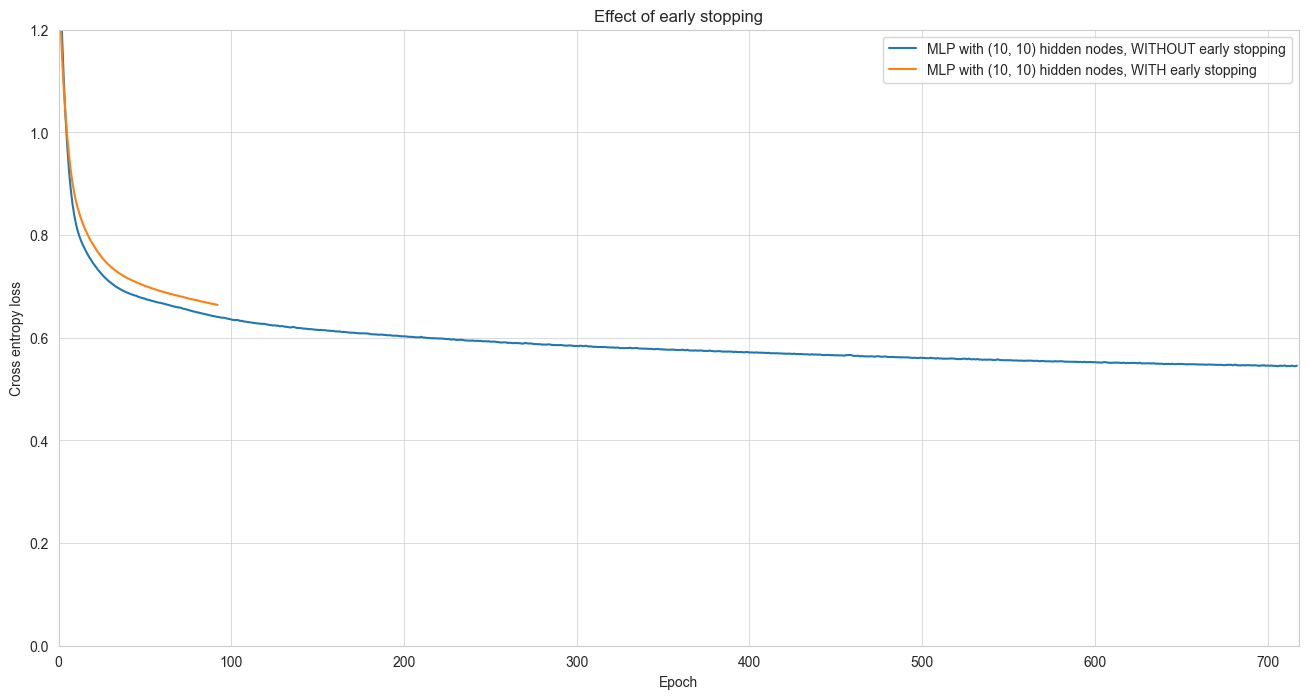

In [50]:
# It is good practice to look at the learning curve, to see how much the model has improved from the initial point,
# and how is has evolved over epochs.
# The learning curve plot also illustrates well what early stopping does.
# mlp = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = 0.001, alpha=0.1, batch_size=250, activation = 'tanh', max_iter = 2000)
fig, ax = plt.subplots(figsize = (16,8))
plt.plot(mlp.loss_curve_,label=f'MLP with {mlp.hidden_layer_sizes} hidden nodes, WITHOUT early stopping')
plt.plot(mlp_early_st.loss_curve_,label=f'MLP with {mlp_early_st.hidden_layer_sizes} hidden nodes, WITH early stopping')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross entropy loss')
ax.grid(True,linewidth = 0.5)
ax.set_ylim(0.0,1.2)
ax.set_xlim(0,mlp.n_iter_)
ax.set_title('Effect of early stopping')
ax.legend()
plt.show()

In [51]:
# Let's evaluate the performance of the MLP with early stopping using our evaluation function
accuracy_train_early_st, accuracy_test_early_st, cross_entropy_train_early_st, cross_entropy_test_early_st = calculate_acc_ce(mlp_early_st,X_train_scaled,Y_train,X_test_scaled, Y_test)

# Report results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_train_early_st:0.3f}\t\t {accuracy_test_early_st:0.3f}')
print(f'Cross entropy\t {cross_entropy_train_early_st:0.3f}\t\t {cross_entropy_test_early_st:0.3f}')

		 Train set	 Test set
Accuracy	 0.701		 0.704
Cross entropy	 0.663		 0.670


### <span style="color:skyblue">Exercise 4: Can we overfit with early stopping?</span> 
`A` Did early stopping reduced overfitting? How can you see this from the results?<br>

Yes early stopping reduced overfitting. The cross entropy on the test set is higher and closer to the cross entropy on the trrain set.

`B` Try if early stoppping also helps to avoid overfitting when using more nodes, e.g. 90 nodes

### CODE YOUR ANSWERS HERE (Use as many cells as you need)
### ANSWERS


In [52]:
layers = (90,90)
n_iter_no_change = 10
mlp_early_st_90 = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = 0.001, alpha=0.1, batch_size=250, activation = 'tanh', max_iter = 2000, early_stopping=True, n_iter_no_change = n_iter_no_change,validation_fraction = 0.25)

# Train the MLP using the train data
mlp_early_st_90.fit(X_train_scaled, Y_train)

# Let's evaluate the performance of the MLP with early stopping using our evaluation function
accuracy_train_early_st_90, accuracy_test_early_st_90, cross_entropy_train_early_st_90, cross_entropy_test_early_st_90 = calculate_acc_ce(mlp_early_st_90,X_train_scaled,Y_train,X_test_scaled, Y_test)

# Report results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_train_early_st_90:0.3f}\t\t {accuracy_test_early_st_90:0.3f}')
print(f'Cross entropy\t {cross_entropy_train_early_st_90:0.3f}\t\t {cross_entropy_test_early_st_90:0.3f}')

		 Train set	 Test set
Accuracy	 0.736		 0.725
Cross entropy	 0.600		 0.632


'Early stoppig also helps to prevent overfittig if we increase the amount of layers'

#### 4. Using k-fold cross validation to evaluate generalisation performance
k-fold cross validation is commonly used to more accurately **evaluate the generalisation performance** of a given network. It improves a simple train-test split approach in that it systematically cuts the data set in k pieces. k-fold cross validation is especially crucial when tuning hyperparameters (as we will see later).

In [53]:
# Create MLP object (plain vanilla MLP without early stopping)
layers = (10,10)
mlp_cv = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = 0.001, alpha=0.1, batch_size=250, activation = 'tanh', max_iter = 2000) 

# Create scoring function
# It is necessary to create a scoring function when working with cross_validate of sk-learn
# We set `greater_is_better` to `False` as we are minimising cross entropy loss
logloss = make_scorer(log_loss, greater_is_better = False, response_method='predict_proba')

# Apply cross_validate, using e.g. 5 folds
# Since we use cross-validation training takes n_folds times longer than using a train-test split
n_folds = 5
cv_results = cross_validate(mlp_cv,X_train_scaled,Y_train,cv = n_folds, scoring=logloss,return_train_score=True)

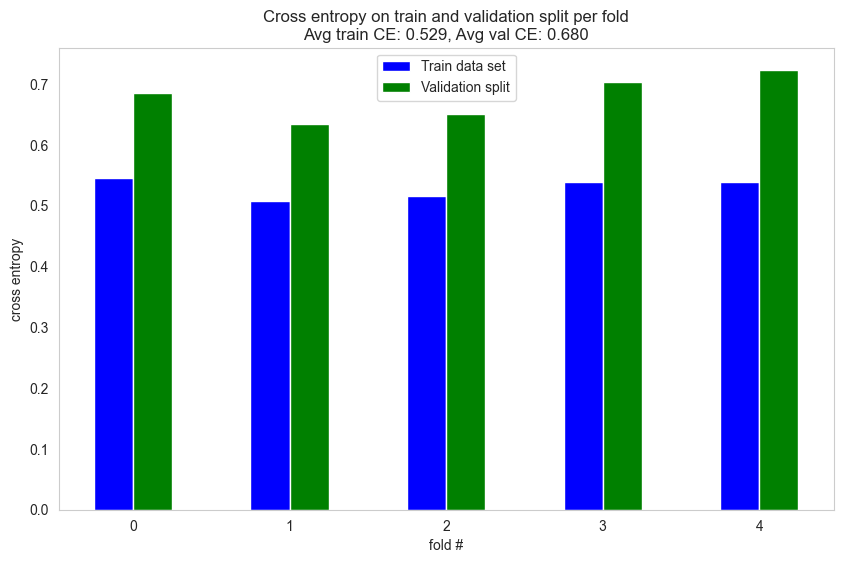

In [54]:
# Plot the train and test performance in a bar plot, for each fold
fig, ax = plt.subplots(figsize=(10, 6))
x_axis = np.arange(n_folds)
ax.bar(x_axis + -0.125, -cv_results['train_score'], color = 'b', width = 0.25,label = 'Train data set')
ax.bar(x_axis +  0.125, -cv_results['test_score'], color = 'g', width = 0.25,label = 'Validation split')
ax.set_xlabel('fold #')
ax.set_ylabel('cross entropy')
ax.grid()
ax.legend()
ax.set_title(f'Cross entropy on train and validation split per fold\nAvg train CE: {np.mean(-cv_results["train_score"]):.3f}, Avg val CE: {np.mean(-cv_results["test_score"]):.3f}')
plt.show()

$\color{red}{\text{Hence, this cross validation analysis supports the finding that a plain vanilla MLP (i.e. without early stopping) overfits the data considerably}}$

#### 5. Tuning hyperparameter
When training MLPs (and most other ML models) there are several parameters we can **'tune'** (optimise) to improve the model's performance. The process of doing this is called **hyperparameter tuning**. Hyperparameter tuning can be done manually, but that is unwieldy. The `GridSearchCV` function in `sk-learn` automates the hyperparameter tuning process. When tuning the hyperparameters, it is mandatory to use a k-fold cross validation approach. Otherwise, there is a risk of overfitting on the test set *because* the parameters can be tweaked until the estimator performs optimally on the test data set.

In [55]:
# Create MLP object (plain vanilla MLP)
mlp_gs = MLPClassifier(activation = 'tanh', solver='adam', batch_size=250, max_iter=4000)

# Define the hyperparameter search space
# 'hidden_layer_sizes' defines the number of nodes and layers
# 'alpha' governs the L2 regularisation
# 'learning_rate_init' governs the learning rate.
hyperparameter_space = {
    'hidden_layer_sizes': [(5),(5,5),(10,10),(20,20)],
    'alpha': [1,1e-2,1e-4],
    'learning_rate_init': [0.01,0.001,0.0001]}

# Create scoring function
logloss = make_scorer(log_loss, greater_is_better = False, response_method='predict_proba')

# Create the grid_search object, with using the MLP classifier
folds = 5 # Number of cross validation splits
mlp_gridsearch = GridSearchCV(mlp_gs, hyperparameter_space, n_jobs=-1, cv=folds,scoring = logloss)

In [56]:
# if the model RF_gridsearch.pickle does not exist, conduct the gridsearch, else load the grid_search object
if not Path('data/mlp_gridsearch.pickle').exists():
    
    # Execute the training/gridsearch
    # Note that this is computationally expensive! 
    # It may take up to 5 minutes, since 3 x 3 x 3 = 27 models need to be trained, each with 5 folds (=135)
    print('Starting gridsearch, this may take several minutes...')
    mlp_gridsearch.fit(X_train_scaled, Y_train)

    # Save the trained grid_search object
    with open('data/mlp_gridsearch.pickle', 'wb') as f:
        pickle.dump(mlp_gridsearch, f)
else:
    # Load the trained grid_search object
    with open('data/mlp_gridsearch.pickle', 'rb') as f:
        mlp_gridsearch = pickle.load(f)

# Print the best parameters
print('Best parameters:')
print(f'Tuned hyperparameters:\n{mlp_gridsearch.best_params_}')
print(f'Best cross entropy loss:\t{(-mlp_gridsearch.best_score_):0.3f}')

Starting gridsearch, this may take several minutes...
Best parameters:
Tuned hyperparameters:
{'alpha': 1, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.001}
Best cross entropy loss:	0.639


Visualise the hyperparameter tuning results

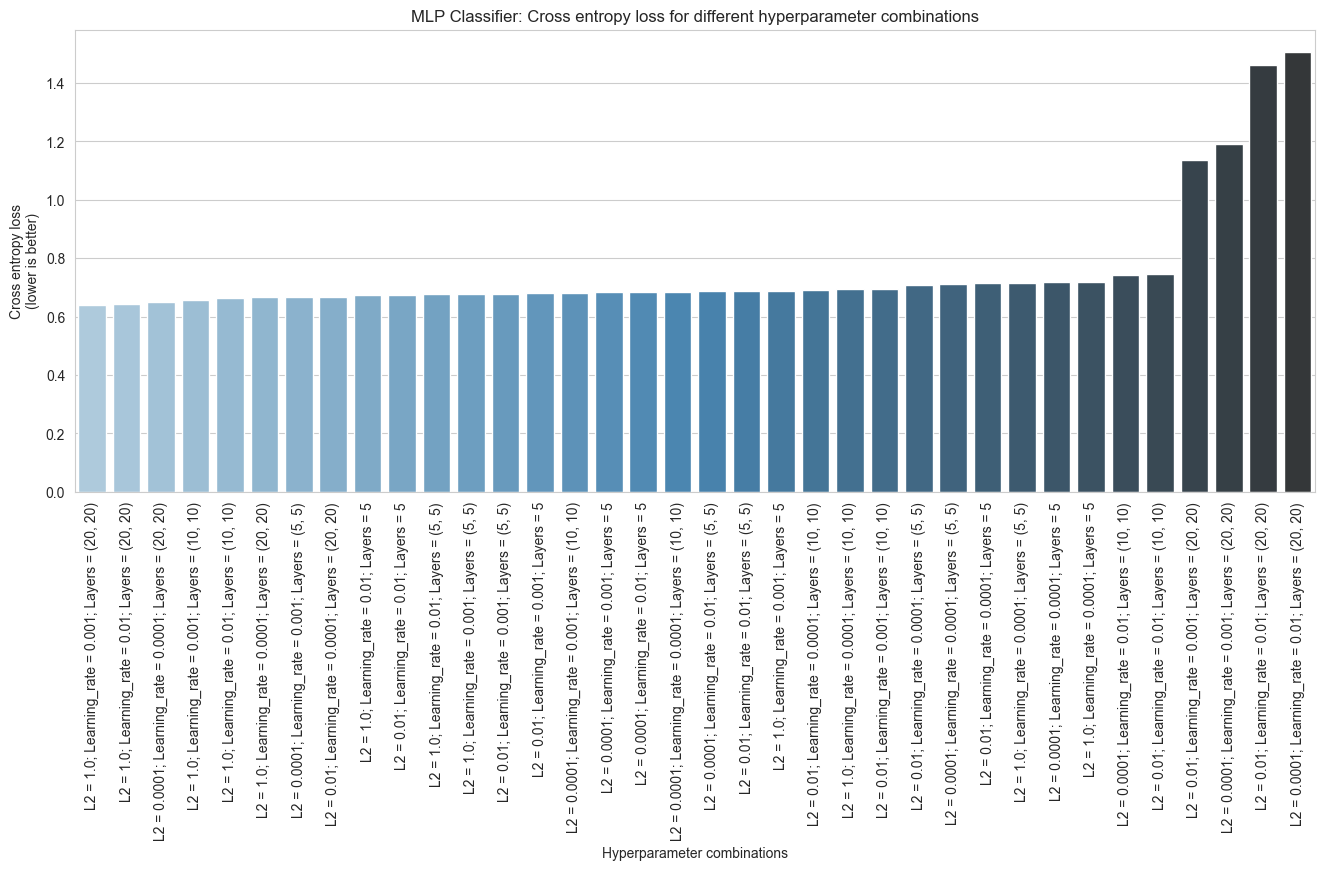

In [57]:
# Collect results into a new pandas dataframe
df_gridsearch = pd.DataFrame.from_dict(mlp_gridsearch.cv_results_)
    
# Add new column with a label for the hyperparameter combinations
df_gridsearch['gs_combinations'] = 'L2 = '+ df_gridsearch['param_alpha'].astype('str') + '; Learning_rate = '+ df_gridsearch['param_learning_rate_init'].astype('str') + '; Layers = ' + df_gridsearch['param_hidden_layer_sizes'].astype('str')
df_gridsearch = df_gridsearch.sort_values('rank_test_score')

# Visualise deviation in performance across hyper parameter settings
plt.figure(figsize = (16,6))
ax = sns.barplot(x = df_gridsearch.gs_combinations,y=-df_gridsearch.mean_test_score,palette="Blues_d", hue=df_gridsearch.gs_combinations, legend = False)
plt.xticks(rotation=90)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Cross entropy loss\n(lower is better)')
plt.title('MLP Classifier: Cross entropy loss for different hyperparameter combinations')
plt.show()

### <span style="color:skyblue">Exercise 5:  Hyperparameter tuning</span> 
`A` What hyperparameter turns out to be particularly impactful on the model performance?<br>

The regularisation is the most important one. We want a high regularisation so large weights are penalized.

`B` Can you think of reasons why this could be the case?

It avoids overfitting. If the model is quite complex, it will just add weights for specific oberservations, so they are well predicted, and it doesn't generalize. However, this would require large weights, but those are penalized. This way there are a lot of weights because of a complex model, but a lot of weights are small.


In [ ]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# ANSWERS

**(Re)Training the model with optimised hyperparameters**<br> 
After completing hypertuning, you know the optimal hyperparameters. <br>
Therefore, after hypertuning we always retrain the model using the optimised hyperparameters, and do not have to keep splits of the data apart for evaluation.

In [58]:
# Create a new mlp object using the optimised hyperparameters, just using the train/test split
layers = mlp_gridsearch.best_params_['hidden_layer_sizes']
lr = mlp_gridsearch.best_params_['learning_rate_init']
alpha = mlp_gridsearch.best_params_['alpha']
mlp_gs = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = lr, alpha=alpha, batch_size=250, activation = 'tanh', max_iter = 2000) 

# Train the model
mlp_gs.fit(X_train_scaled,Y_train)

,hidden_layer_sizes,"(20, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,1
,batch_size,250
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True
,random_state,None


In [59]:
# Let's also evaluate performance of the hypertuned model using our evaluation function
accuracy_train_gs, accuracy_test_gs, cross_entropy_train_gs, cross_entropy_test_gs = calculate_acc_ce(mlp_gs,X_train_scaled,Y_train,X_test_scaled, Y_test)

# Report results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_train_gs:0.3f}\t\t {accuracy_test_gs:0.3f}')
print(f'Cross entropy\t {cross_entropy_train_gs:0.3f}\t\t {cross_entropy_test_gs:0.3f}')

		 Train set	 Test set
Accuracy	 0.762		 0.740
Cross entropy	 0.543		 0.593


#### 6. Evaluating and comparing performances across trained models

To evaluate the performance of a wide range is metrics are available, beyond generalisation performance.<br>
Here, we look at:<br>
i. Confusion matrix<br>
ii. Precision and Recall<br>
iii. Matthew's correlation coefficient

**i) Confusion matrix**<br>
Confusion matrices shows counts from predicted and actual outcomes. The counts on the diagonal are correctly classified outcomes (the model predictions and the ground truth are the same). The counts on the off-diagonal elements are the misclassified outcomes. Hence, the best classifier will have a confusion matrix with only diagonal elements and the rest of the elements set to zero.

In [ ]:
# Let's create a function that returns the accuracy and the cross entropy, for the train and test data sets
def calculate_acc_ce(mlp,X_train,Y_train,X_test, Y_test):

    def calculate_acc(mlp,X,Y):
        accuracy = mlp.score(X,Y)
        return accuracy

    def calculate_ce(mlp,X,Y):
        # Compute cross entropy
        # Use the model object to predict probabilities per class
        prob = mlp.predict_proba(X)

        # Multiply the probabilities with Y (0/1 array), and sum along the row axis to obtain the predicted probability of the target
        Y_dummy = pd.get_dummies(Y).to_numpy()
        prob_chosen = np.sum(prob*Y_dummy,axis=1)

        # Take the logarithm
        log_prob_chosen = np.log(prob_chosen)

        # Compute the cross entropy
        cross_entropy = -np.sum(log_prob_chosen)/len(Y)
        return cross_entropy

    # Compute the accuracy
    acc_train = calculate_acc(mlp,X_train,Y_train)
    acc_test  = calculate_acc(mlp,X_test,Y_test)

    # Apply cross entropy function
    ce_train = calculate_ce(mlp,X_train,Y_train)
    ce_test = calculate_ce(mlp,X_test,Y_test)
    return acc_train, acc_test, ce_train, ce_test

In [76]:
cm_early_st = confusion_matrix(Y_test, mlp_early_st.predict(X_test_scaled), normalize=None).T
cm_gs = confusion_matrix(Y_test, mlp_gs.predict(X_test_scaled), normalize=None).T


cm_early_st_norm = confusion_matrix(Y_test, mlp_early_st.predict(X_test_scaled), normalize='true').T
cm_gs_norm = confusion_matrix(Y_test, mlp_gs.predict(X_test_scaled), normalize='true').T

In [77]:
vmax_raw = max(cm_early_st.max(), cm_gs.max())             # for raw counts
vmax_norm = max(cm_early_st_norm.max(), cm_gs_norm.max())  # for normalised
print(vmax_raw, vmax_norm)

1398 0.8498480243161094


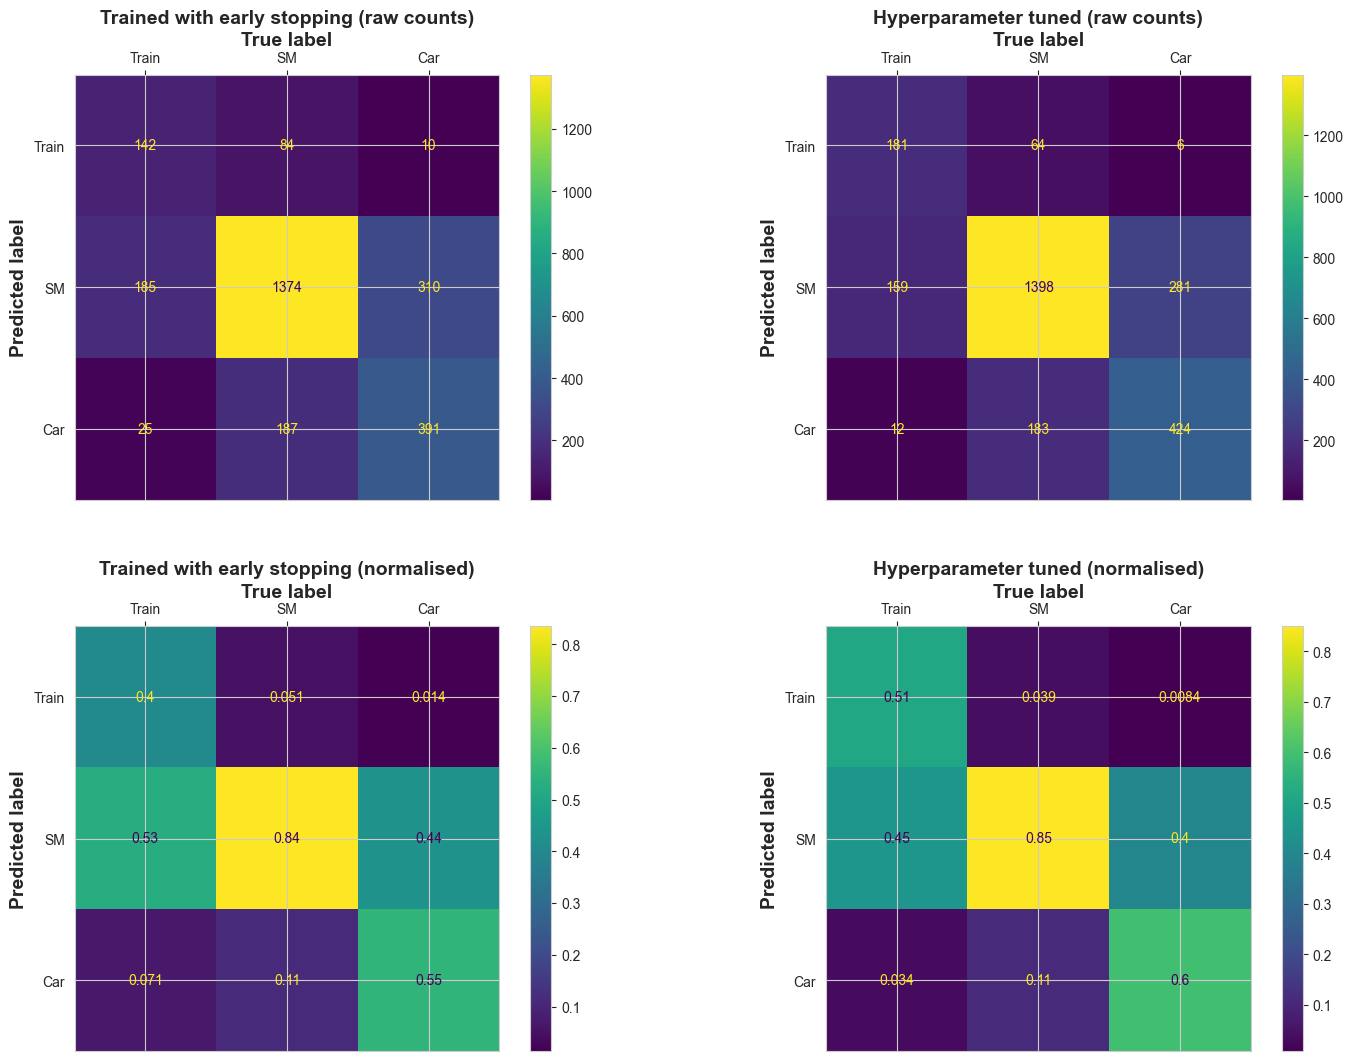

In [68]:
# Predict the choices for the test data set, using the MLP trained with early stopping and MLP with hyperparameters tuned
Y_pred_early_st  = mlp_early_st.predict(X_test_scaled)  # 0/1 predictions of MLP trained with early stopping
Y_pred_gs = mlp_gs.predict(X_test_scaled)                      # 0/1 predictions of MLP with hyperparameters tuned

# Show the confusion matrices, to compare the hyperparameter tuned network with the early stopping network
fig, ax = plt.subplots(2,2,figsize = (16,12))
plt.tight_layout(pad=7)
ylabels = ['Train', 'SM', 'Car']

# Confusion matrix for MLP with early stopping
cm_early_st = confusion_matrix(Y_test, Y_pred_early_st,normalize=None).T
cm_early_st_norm = confusion_matrix(Y_test, Y_pred_early_st,normalize='true').T
ConfusionMatrixDisplay(confusion_matrix=cm_early_st, display_labels=ylabels).plot(ax=ax[0,0])
ConfusionMatrixDisplay(confusion_matrix=cm_early_st_norm, display_labels=ylabels).plot(ax=ax[1,0])

# Confusion matrix for MLP with hyperparameter tuning
cm_gs = confusion_matrix(Y_test,Y_pred_gs).T
cm_gs_norm = confusion_matrix(Y_test,Y_pred_gs,normalize='true').T
ConfusionMatrixDisplay(confusion_matrix=cm_gs, display_labels=ylabels).plot(ax=ax[0,1])
ConfusionMatrixDisplay(confusion_matrix=cm_gs_norm, display_labels=ylabels).plot(ax=ax[1,1])

# Set titles
ax[0,0].set_title('Trained with early stopping (raw counts)',fontsize=14,fontweight='bold')
ax[1,0].set_title('Trained with early stopping (normalised)',fontsize=14,fontweight='bold')
ax[0,1].set_title('Hyperparameter tuned (raw counts)',fontsize=14,fontweight='bold')
ax[1,1].set_title('Hyperparameter tuned (normalised)',fontsize=14,fontweight='bold')
for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel('True label',fontsize=14,fontweight='bold')
        ax[i,j].set_ylabel('Predicted label',fontsize=14,fontweight='bold')
        ax[i,j].xaxis.set_label_position('top')
        ax[i,j].xaxis.tick_top()


### <span style="color:skyblue">Exercise 6:  Model accuracy</span> 
Accuracy is defined as the true positives over the total number of cases.<br>
`A` Manually compute the prediction accuracy of the model with early stopping and the model with hyperparameter tuning<br>
`B` For which class (Train/SM/Car) does the hyperparameter tuning improves the prediction accuracy most?<br>

In [109]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# ANSWERS
def accuracy(model, X, Y_test):
    Y_test_pred = model.predict(X)
    Y_test = list(Y_test)

    true_positive_count = 0
    for i in Y_test_pred:
        if Y_test_pred[i] == Y_test[i]:
            true_positive_count +=1
        else:
            continue

    accuracy = true_positive_count / len(Y_test)
    return print(f'The accuracy for the model is {accuracy}')

accuracy(mlp_early_st, X_test_scaled, Y_test)

accuracy(mlp_gs, X_test_scaled, Y_test)

The accuracy for the model is 0.6901772525849336
The accuracy for the model is 0.7714180206794683


In [110]:
# class-wise accuracy early stopping
class_acc_early = cm_early_st.diagonal() / cm_early_st.sum(axis=1)

# class-wise accuracy hyperparameter tuned
class_acc_gs    = cm_gs.diagonal() / cm_gs.sum(axis=1)

# improvement per class
improvement = class_acc_gs - class_acc_early

print("Train/SM/Car accuracy early:", class_acc_early)
print("Train/SM/Car accuracy gs:", class_acc_gs)
print("Improvement:", improvement)

Train/SM/Car accuracy early: [0.60169492 0.73515249 0.64842454]
Train/SM/Car accuracy gs: [0.72111554 0.76060936 0.68497577]
Improvement: [0.11942062 0.02545687 0.03655122]


So the Train does the GS improve the prediction the most.

**ii) Precision and Recall**<br>
Looking at the confusion matrices, the improvements in prediction accuracy due to the hyperparameter tuning may not seem very impressive. However, one should keep in mind that 0/1 predictions are sensitive to class imbalances, which are present in these data. Moreover, accuracy can be a misleading metric for imbalanced data sets. A naive model that would simply always predict "SM" will already do quite good.

To assess the model performance in more depth, we thus must look at the predictions at the level of the classes.<br> 
Next, we compute Precision and Recall.<br>
* **Precision** Tells you what fraction of predictions for a given class are actually of that class.<br>
* **Recall** Tells what fraction of all observations belonging to a given class are correctly predicted as such by the model. Recall is also known as True Positive Rate (TPR), Sensitivity, Probability of Detection. <br>

In [111]:
# To calculate the precision and recal score we conveniently use sk-learn's 'classification_report' functionality
print('Classification report for plain vanilla MLP with early stopping\n',classification_report(Y_test,Y_pred_early_st, target_names= ylabels))
print('\nClassification report for plain vanilla MLP with hyperparameters tuned\n',classification_report(Y_test,Y_pred_gs, target_names= ylabels))

Classification report for plain vanilla MLP with early stopping
               precision    recall  f1-score   support

       Train       0.60      0.40      0.48       352
          SM       0.74      0.84      0.78      1645
         Car       0.65      0.55      0.60       711

    accuracy                           0.70      2708
   macro avg       0.66      0.60      0.62      2708
weighted avg       0.70      0.70      0.69      2708


Classification report for plain vanilla MLP with hyperparameters tuned
               precision    recall  f1-score   support

       Train       0.72      0.51      0.60       352
          SM       0.76      0.85      0.80      1645
         Car       0.68      0.60      0.64       711

    accuracy                           0.74      2708
   macro avg       0.72      0.65      0.68      2708
weighted avg       0.74      0.74      0.73      2708



**iii) Matthew's correlation coefficient**<br>
Another commonly used metric to evaluate the prediction performance while accounting for imbalances in the data set is  Matthew's correlation coefficient. Matthew's Correlation Coefficient (MCC) is generally regarded as being one of the best measures to describe the confusion matrix of true and false positives and negatives by a **single number**, even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

In [112]:
# Taking into account the imbalances of the data
print(f'Matthews correlation coefficient for plain Vanilla MLP with early stopping:\t {matthews_corrcoef(Y_test, Y_pred_early_st):4.3f}')
print(f'Matthews correlation coefficient for plain Vanilla MLP with hypertuning:\t {matthews_corrcoef(Y_test, Y_pred_gs):4.3f}')

Matthews correlation coefficient for plain Vanilla MLP with early stopping:	 0.427
Matthews correlation coefficient for plain Vanilla MLP with hypertuning:	 0.500


### <span style="color:skyblue">Exercise 7:  Model precision, recall, and Matthew's correlation coefficent</span> 
`A` Compare and interpret the results from the classifications reports between the early stopping and hypertuned model.<br>
`B` Compare and interpret the results from Matthew's correlation coefficient between the early stopping and hypertuned model.

So,     The recall is not good for the train in the early stopping. It is significantly improved in the hypertuned model.

All the metrics are better in the hyptertuned model, even though it doesnt change much for the car and the SM.

Matthew's correlation coefficient is also better in the hypertuned model. We could have expected that because all the individual coeffcients are also better in the hypertuned model. 